In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
plt.rcParams["figure.dpi"] = 120

In [32]:
data_dir = "../data"

In [136]:
df = pd.read_pickle(
    f"{data_dir}/full/bert_results_719253_ds-ag-pubmed.pkl"
).dropna(subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"])

In [137]:
df

,text,label,origin,uncertainty_before,uncertainty_after,uncertainty_difference
0,Fears for T N pension after talks Unions repre...,Business,ag_news,69.390465,30.775408,-38.615057
1,The Race is On: Second Private Team Sets Launc...,Sci/Tech,ag_news,24.055721,7.644021,-16.411701
2,Ky. Company Wins Grant to Study Peptides (AP) ...,Sci/Tech,ag_news,40.485832,5.709909,-34.775923
3,Prediction Unit Helps Forecast Wildfires (AP) ...,Sci/Tech,ag_news,38.794056,8.647099,-30.146956
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,Sci/Tech,ag_news,50.032295,13.168285,-36.864010
...,...,...,...,...,...,...
17282,The ability of several beta-adrenoceptor antag...,Medicine,pubmed,18.077650,5.935628,-12.142022
17283,The kinetics of aniline hydroxylation was stud...,Medicine,pubmed,13.761489,4.869628,-8.891860
17284,The authors report of case of splenogonadic fu...,Medicine,pubmed,55.738575,5.389524,-50.349051
17285,"Chlorotetrolic acid and, even better, the corr...",Medicine,pubmed,31.459185,5.331035,-26.128150


In [138]:
df_melted = df[["label", "uncertainty_before", "uncertainty_after"]].melt(
    id_vars=["label"],
    value_vars=["uncertainty_before", "uncertainty_after"],
    var_name="type",
    value_name="uncertainty",
)
df_melted["type"] = df_melted["type"].map(
    {
        "uncertainty_before": "Before",
        "uncertainty_after": "After",
    }
)

df_melted

,label,type,uncertainty
0,Business,Before,69.390465
1,Sci/Tech,Before,24.055721
2,Sci/Tech,Before,40.485832
3,Sci/Tech,Before,38.794056
4,Sci/Tech,Before,50.032295
...,...,...,...
33945,Medicine,After,5.935628
33946,Medicine,After,4.869628
33947,Medicine,After,5.389524
33948,Medicine,After,5.331035


<Axes: xlabel='label', ylabel='uncertainty'>

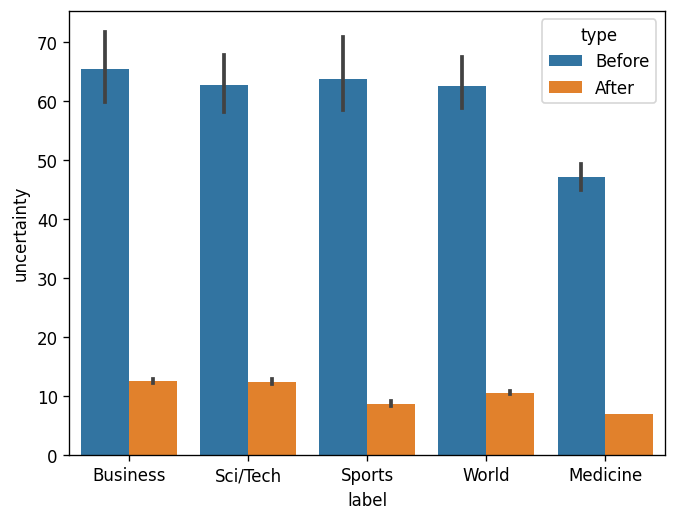

In [139]:
sns.barplot(data=df_melted, x="label", y="uncertainty", hue="type")

<Axes: xlabel='label', ylabel='uncertainty_difference'>

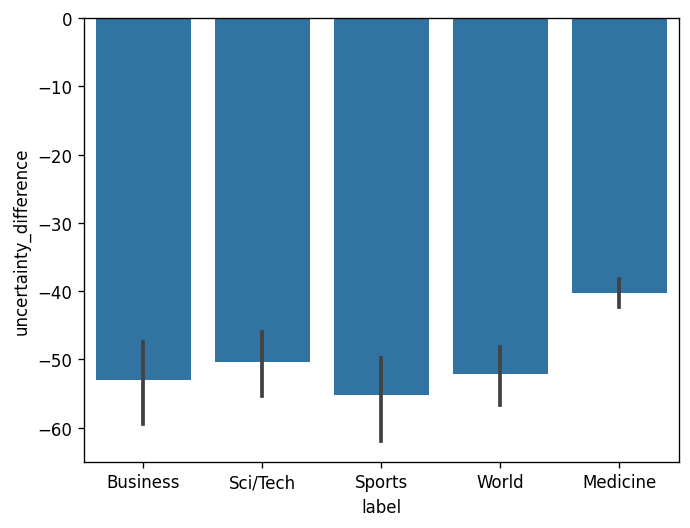

In [140]:
sns.barplot(data=df, x="label", y="uncertainty_difference")

In [141]:
sports_group = df[df["label"] == "Sports"]["uncertainty_difference"]
other_groups = df[df["label"] != "Sports"]["uncertainty_difference"]

t_stat, p_value = ttest_ind(sports_group, other_groups, equal_var=False)

print(f"Sports vs Others T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

Sports vs Others T-statistic: -3.1995, P-value: 0.0014


In [142]:
labels = df["label"].unique()

for label in labels:
    if label != "Sports":
        other_group = df[df["label"] == label]["uncertainty_difference"]
        t_stat, p_value = ttest_ind(sports_group, other_group, equal_var=False)
        print(f"Sports vs {label:<10} T-statistic: {t_stat:>12.4f}, P-value: {p_value:.4f}")

Sports vs Business   T-statistic:      -0.4850, P-value: 0.6277
Sports vs Sci/Tech   T-statistic:      -1.1864, P-value: 0.2355
Sports vs World      T-statistic:      -0.7944, P-value: 0.4270
Sports vs Medicine   T-statistic:      -4.4520, P-value: 0.0000
